In [70]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn import linear_model

In [71]:
file_train = 'Flight_Data_Train.xlsx'
file_x_test = 'Flight_Test_set.xlsx'
file_y_test = 'Flight_Sample_Submission.xlsx'

In [72]:
def my_func(ds, type_data):    

    print ('\n Printing head of data: ', ds.head())    
    print ('\nInitial shape of dataset: ', ds.shape)
    
    # Removing the duplicate rows from the dataset
    print ('\nShape of dataset before removing duplicates: ', ds.shape)
    # Dropping the duplicate rows
    ds = ds.drop_duplicates(keep='first')
    print ('Shape of dataset after removing duplicates: ', ds.shape)
    
    # Checking columns of dataset
    print ('\n Columns of dataset: \n\n', ds.columns)
    
    # data types of columns
    print ('\nData types of columns:\n\n ', ds.dtypes)
    
    # Info of columns
    print ('\nInfo of columns: \n\n')
    print (ds.info())
    
    # identifying the number columns
    ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
    print ('\n Integer Data Columns in the dataset: \n\n', ds_int.columns)
    
    # identifying the category columns
    ds_cat = ds.select_dtypes(include=['object'])
    print ('\n Category columns in the dataset:\n\n', ds_cat.columns)
    
    print ('\nChecking the unique values of columns of dataset\n\n')
    print ('\nUnique values of Airline: \n\n', ds['Airline'].unique())
    print ('\nUnique values of flight Total_Stops: \n\n', ds['Total_Stops'].unique())
    
    print ('\nStatistical Summary: \n\n')
    print (ds.describe())

    print ('\n Checking for null values in the dataset: \n\n', ds.isnull().sum())
    ds.replace(np.nan, 0, inplace=True)
    print ('\n Checking the dataset after removing null values: \n\n', ds.isna().sum())
    
    print ('\nPrinting head of the data: \n', ds.head())
    
    if (type_data == 'Train'):
        print ('\ncorelation of data shows only price as its only the number column in the dataset\n', ds.corr())    

    print ('\n Univariate Analysis\n\n')    
    print ('\n Univariate categorical plots\n\n')
    plot_cat('Airline', ds)
    plot_cat('Date_of_Journey', ds)
    plot_cat('Duration', ds)    

    print ('\nUsing LabelEncoder to convert categorical data to number data\n\n')
    le = LabelEncoder()    
    for i in ds_cat:
        ds[i] = le.fit_transform(ds[i].astype(str))        
    print ('\n Data Types after using LabelEncoder\n\n', ds.dtypes)
    
    print ('\nViolinplot:\n\n')
    print ('\n It shows where the more values of the dataset lies\n')    
    plot_violin(ds['Total_Stops'])
    plot_violin(ds['Arrival_Time'])
    plot_violin(ds['Duration'])
    plot_violin(ds['Source']) 
    
    print ('\nPlotting outliers:\n\n')    
    plot_box(ds['Date_of_Journey'])
    plot_box(ds['Source'])
    plot_box(ds['Route'])
    plot_box(ds['Dep_Time'])
    plot_box(ds['Arrival_Time'])
    plot_box(ds['Duration'])
    plot_box(ds['Total_Stops'])
    
    print ('\nBy looking at the plots, it seems outliers are present in the dataset\n\n')    
    print ('\nDistribution plot: To check the skewness of data\n\n')
    plot_dist(ds['Date_of_Journey'])
    plot_dist(ds['Source'])
    plot_dist(ds['Destination'])
    plot_dist(ds['Dep_Time'])
    plot_dist(ds['Arrival_Time'])
    plot_dist(ds['Dep_Time'])
    print ('\n Distribution plot shows data is not normally distributed\n\n')
    
    print ('\nHistograms: It show the frequency distribution of the data\n\n')
    plot_hist(ds['Destination'])
    plot_hist(ds['Arrival_Time'])
    plot_hist(ds['Dep_Time'])
    plot_hist(ds['Source'])
    plot_hist(ds['Date_of_Journey'])

    print ('\nBivariate Analysis\n\n')    
    print ('\nLineplot\n\n')
    plot_line('Source', 'Destination', ds)
    plot_line('Date_of_Journey', 'Destination', ds)
    plot_line('Source', 'Duration', ds)
    
    
    if (type_data == 'Train'):
        print ('\nBarplots\n\n')
        plot_bar(ds['Source'], ds['Price'], ds)
        plot_bar(ds['Duration'], ds['Price'], ds)
        plot_bar(ds['Date_of_Journey'], ds['Price'], ds)
        plot_bar(ds['Arrival_Time'], ds['Price'], ds)    
        plot_line('Date_of_Journey', 'Price', ds)   
        
    plot_pair(ds)
    
    print('\nChecking the \'z score\' / outliers of the dataset, if present, will remove it\n\n')
    z_scr = abs(zscore(ds))
    print ('Before removing zscore: ', ds.shape)

    ds_final = ds.loc[(z_scr < 3).all(axis=1)]
    print ("After removing zscore: ", ds_final.shape)
    
    print ('\nAssigning the input and output data\n\n') 
    
    if (type_data == 'Train'):
        df_x = ds_final.drop(columns = ['Price'])
        y = ds_final['Price']
        print ('\nY Shape : ', y.shape)
    else:
        df_x =  ds_final    
        
    print ('\nStandardScaler is used to scale the data\n\n')
    sc = StandardScaler()
    x = sc.fit_transform(df_x)
    x = pd.DataFrame(x, columns=df_x.columns)
    print ('\n X shape : ', x.shape)
    
    print ('\nChecking the skewness of data\n\n')
    print ( x.skew())
    skew_val = x.skew()    
    print ('\nSkew val: skew_val\n\n')
    
    print ('\nRemoving skewness of data\n\n') 
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col])
            
    print ('\nChecking skewness after removing skewed data: \n\n', x.skew())
        
    print ('\nRemoving skewness of data\n\n') 
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col])            
    print ('\nChecking skewness after removing skewed data: \n\n', x.skew())     
    
    print ('\nreplacing NaN values with 0\n\n')    
    x.replace(np.NaN, 0, inplace=True)
    
    if (type_data == 'Train'):
        return (x,y)
    else:
        return (x)

In [73]:
# remove skewness of data
def remove_skew(x):
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col]) 
    return (x)

In [74]:
# Subroutine for boxplot
def plot_box(column):
    sns.boxplot(column)
    plt.show()
    return

In [75]:
# Swarmplot
def plot_swarm(col1, col2, ds):
    sns.swarmplot(x=col1, y=col2, data=ds)
    plt.show()
    return

In [76]:
# Distributionplot
def plot_dist(column):
    sns.distplot(column)
    plt.show()
    return

In [77]:
# Histogram
def plot_hist(column):
    plt.hist(column)
    plt.show()
    return

In [78]:
# Violinplot
def plot_violin(column):
    sns.violinplot(column)
    plt.show()
    return

In [79]:
# categoryplot
def plot_cat(column, ds):
    sns.catplot(x=column, data=ds)
    plt.show()
    return

In [80]:
# Boxenplot
def plot_boxen(column):
    sns.boxenplot(column)
    plt.show()
    return

In [81]:
# Barplot
def plot_bar(col1, col2, ds):
    sns.barplot(x=col1, y=col2, data=ds)
    plt.show()
    return

In [82]:
# Lineplot
def plot_line(col1, col2, ds):
    ds.plot(col1, col2, kind='line')
    plt.show()
    return

In [83]:
# pairplot
def plot_pair(ds):
    sns.pairplot(ds)
    plt.show()
    return

In [84]:
def read_data(file_name):
    # Reading file
    print ('Filename : ', file_name)
    ds = pd.read_excel(file_name)
    return (ds)

# Flight Training Dataset

In [85]:
ds = read_data(file_train)
ds

Filename :  Flight_Data_Train.xlsx


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648



 Printing head of data:         Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  

Initial shape of dataset:  (10683, 11)

Shape of dataset before removing

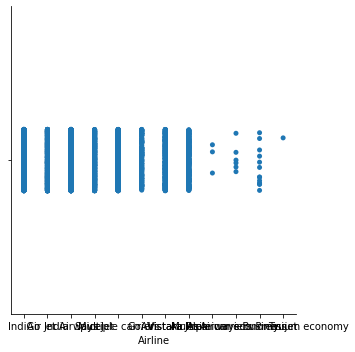

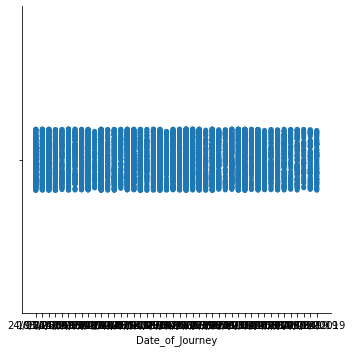

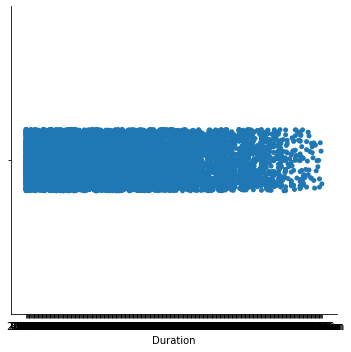


Using LabelEncoder to convert categorical data to number data



 Data Types after using LabelEncoder

 Airline            int32
Date_of_Journey    int32
Source             int32
Destination        int32
Route              int32
Dep_Time           int32
Arrival_Time       int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
Price              int64
dtype: object

Violinplot:



 It shows where the more values of the dataset lies



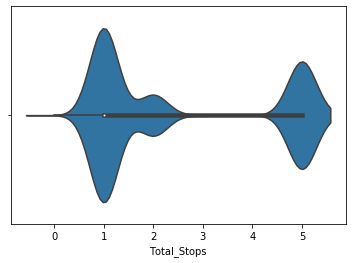

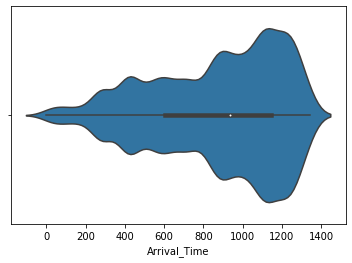

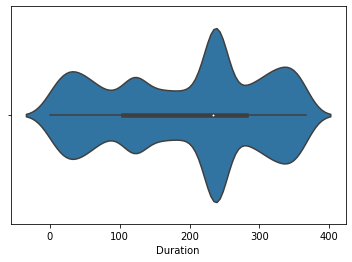

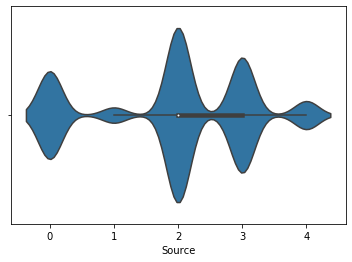


Plotting outliers:




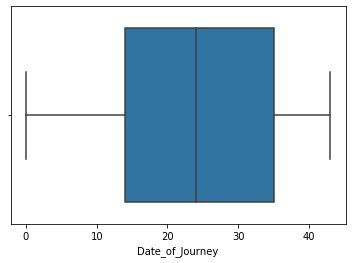

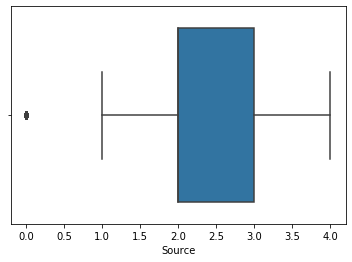

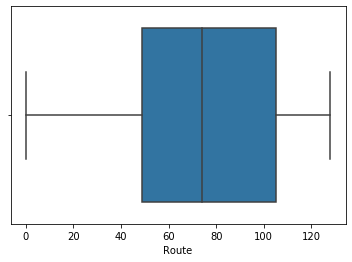

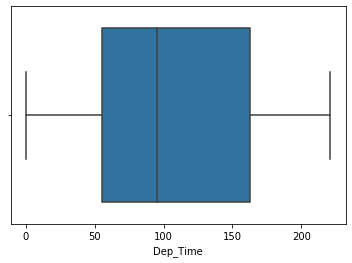

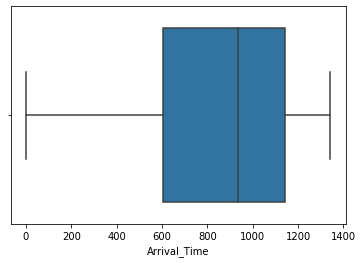

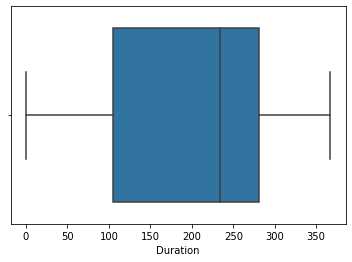

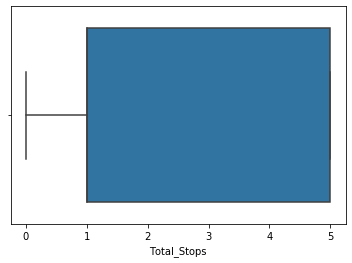


By looking at the plots, it seems outliers are present in the dataset



Distribution plot: To check the skewness of data




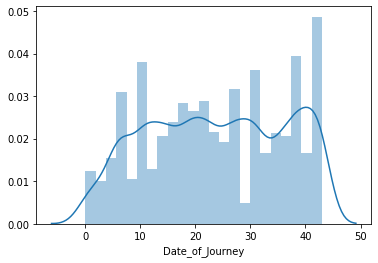

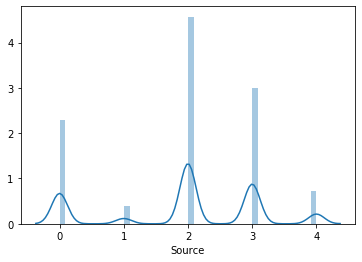

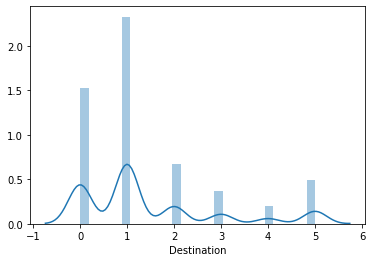

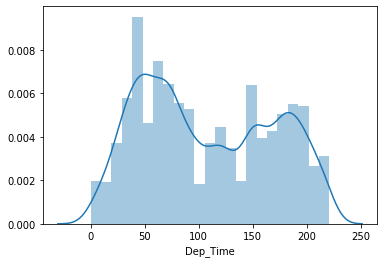

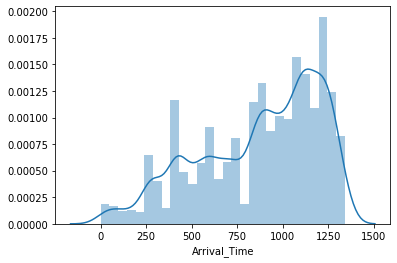

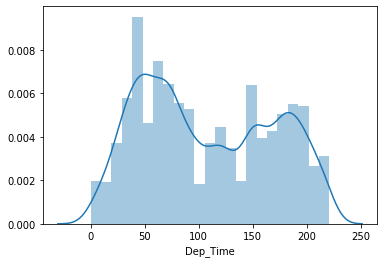


 Distribution plot shows data is not normally distributed



Histograms: It show the frequency distribution of the data




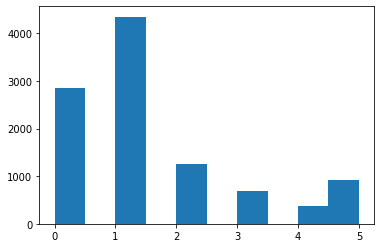

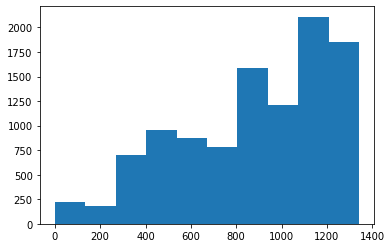

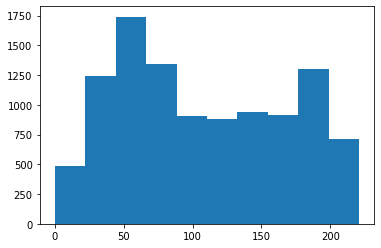

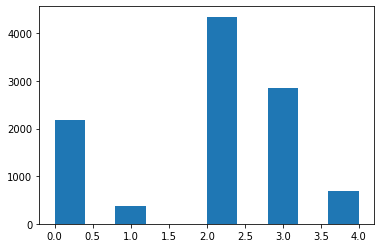

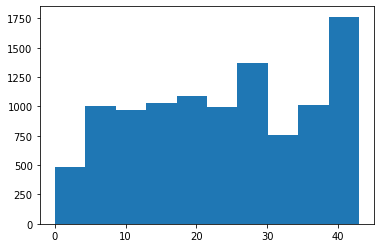


Bivariate Analysis



Lineplot




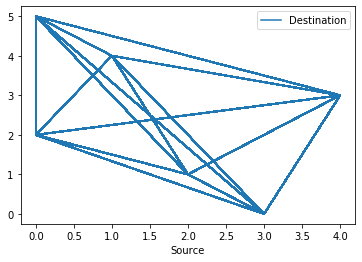

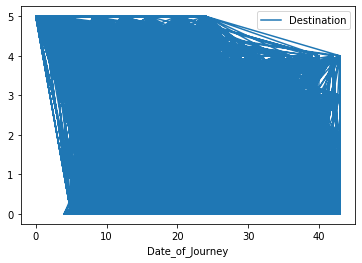

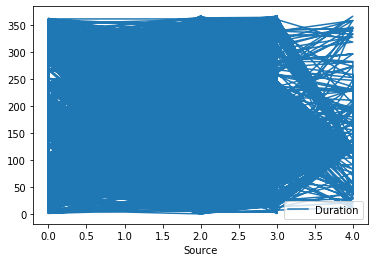


Barplots




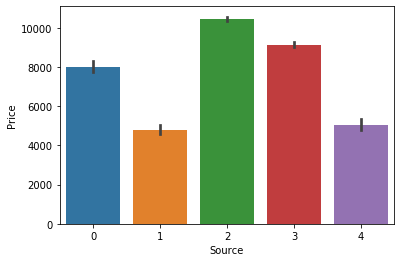

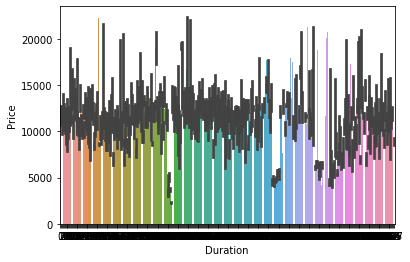

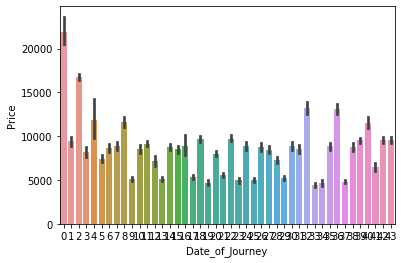

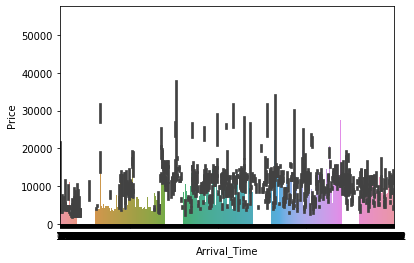

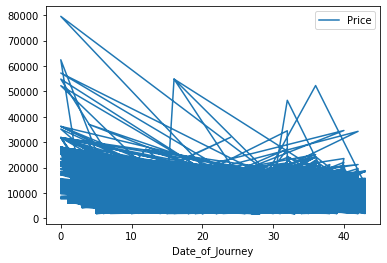

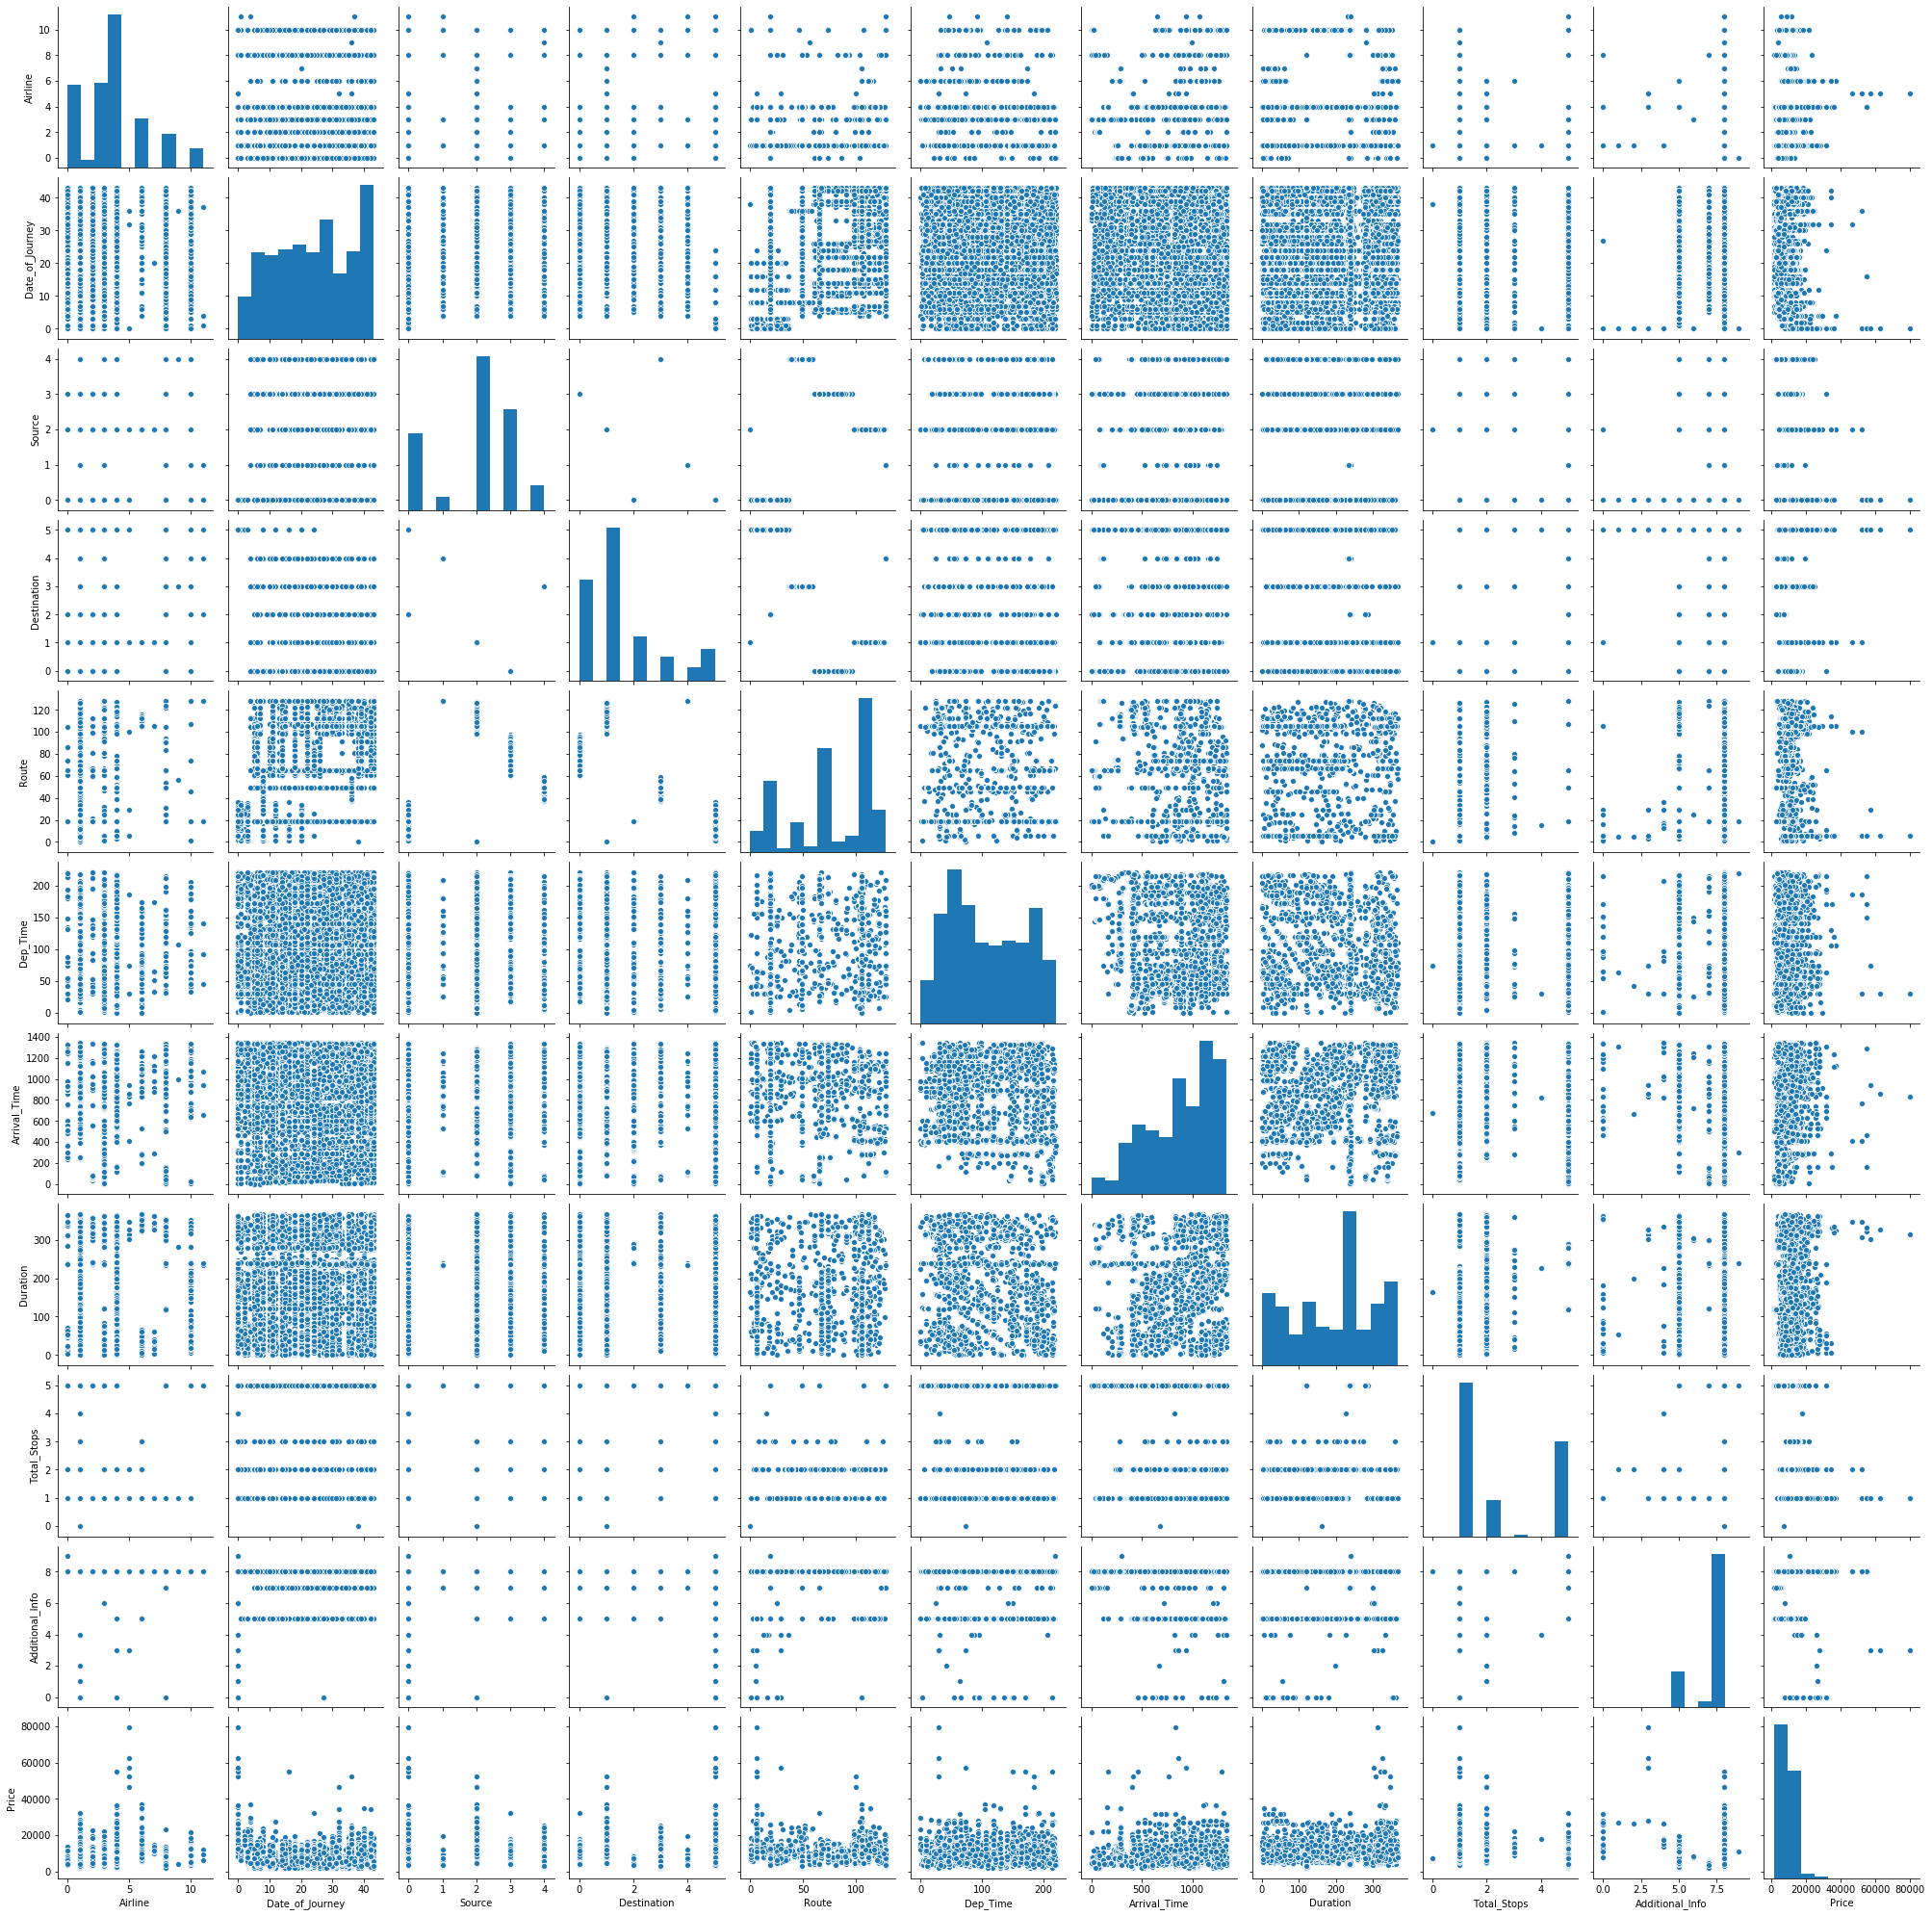


Checking the 'z score' / outliers of the dataset, if present, will remove it


Before removing zscore:  (10463, 11)
After removing zscore:  (10358, 11)

Assigning the input and output data



Y Shape :  (10358,)

StandardScaler is used to scale the data



 X shape :  (10358, 10)

Checking the skewness of data


Airline            0.724055
Date_of_Journey   -0.059156
Source            -0.435266
Destination        1.250295
Route             -0.491063
Dep_Time           0.193176
Arrival_Time      -0.619272
Duration          -0.229912
Total_Stops        0.603294
Additional_Info   -1.544020
dtype: float64

Skew val: skew_val



Removing skewness of data



Checking skewness after removing skewed data: 

 Airline            0.653515
Date_of_Journey   -0.059156
Source            -0.435266
Destination        0.163793
Route             -0.491063
Dep_Time           0.193176
Arrival_Time      -0.619272
Duration          -0.229912
Total_Stops       -8.840551
Additional_Info   -1.544020
dtype: fl

In [86]:
(x1, y1) = my_func(ds, 'Train')
print ('\nTraining dataset shape: ', x1.shape, y1.shape)


# Flight Testing Dataset

In [87]:
ds = read_data(file_x_test)
ds

Filename :  Flight_Test_set.xlsx


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info



 Printing head of data:               Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  

Initial shape of dataset:  (2671, 10

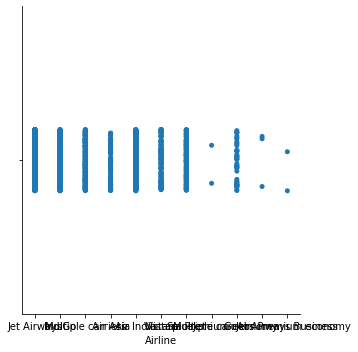

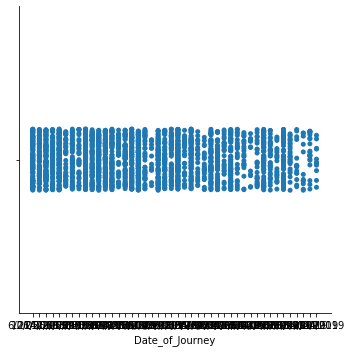

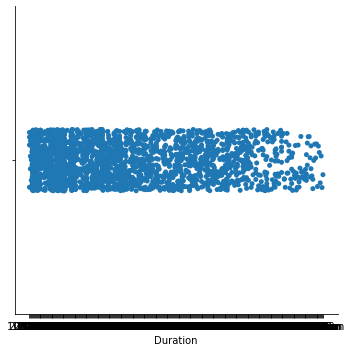


Using LabelEncoder to convert categorical data to number data



 Data Types after using LabelEncoder

 Airline            int32
Date_of_Journey    int32
Source             int32
Destination        int32
Route              int32
Dep_Time           int32
Arrival_Time       int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
dtype: object

Violinplot:



 It shows where the more values of the dataset lies



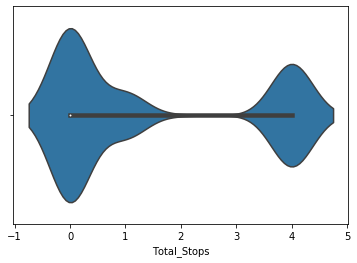

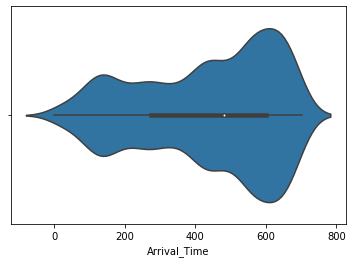

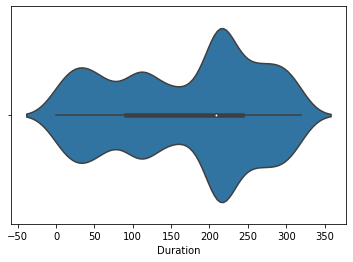

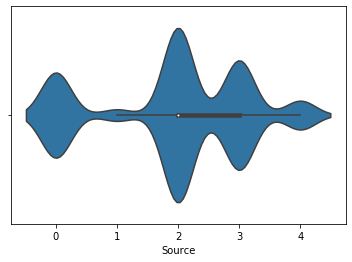


Plotting outliers:




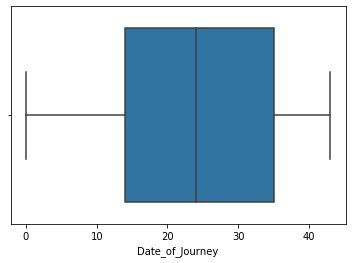

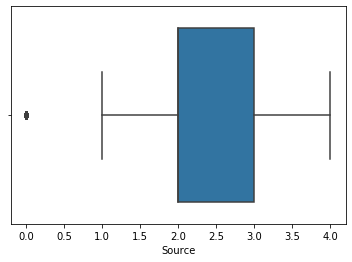

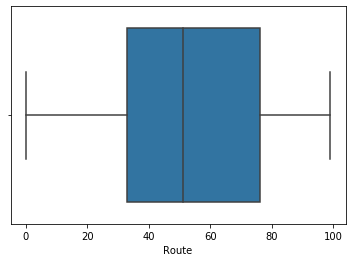

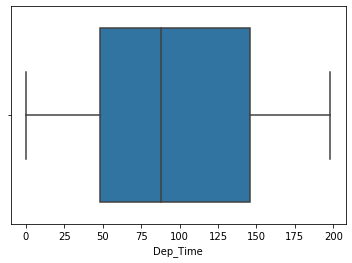

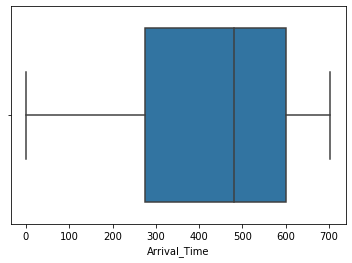

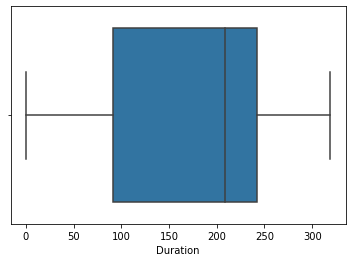

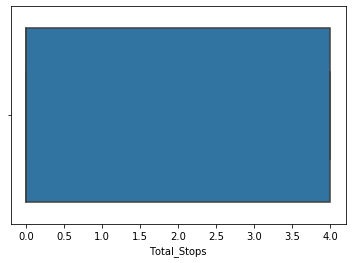


By looking at the plots, it seems outliers are present in the dataset



Distribution plot: To check the skewness of data




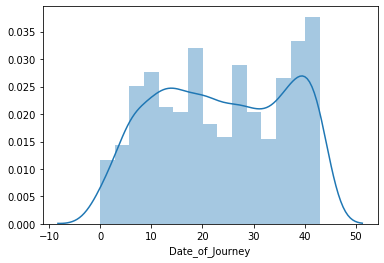

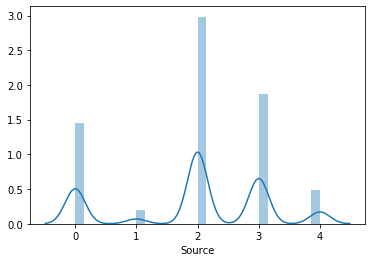

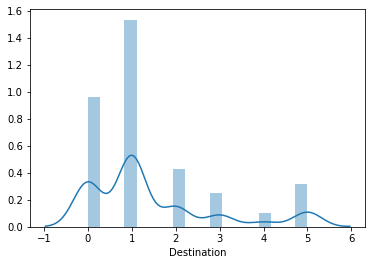

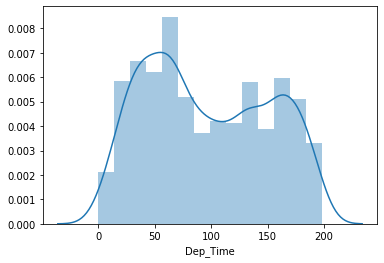

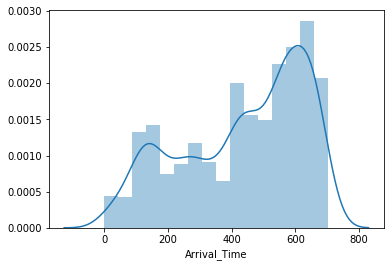

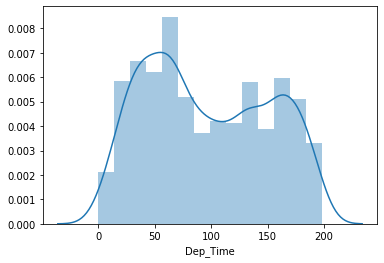


 Distribution plot shows data is not normally distributed



Histograms: It show the frequency distribution of the data




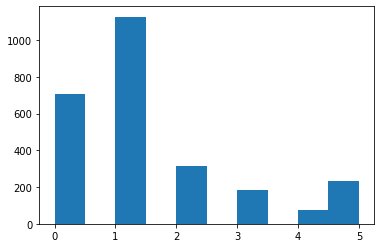

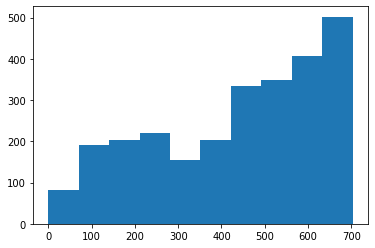

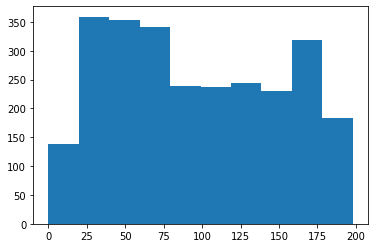

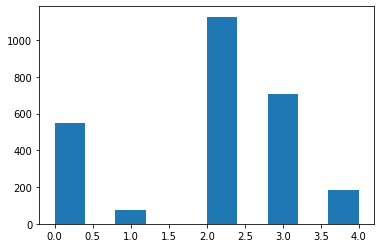

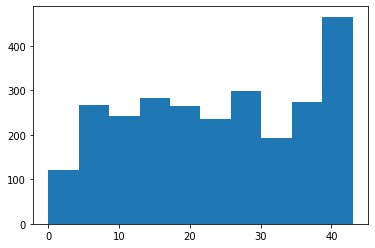


Bivariate Analysis



Lineplot




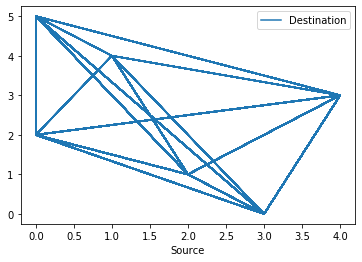

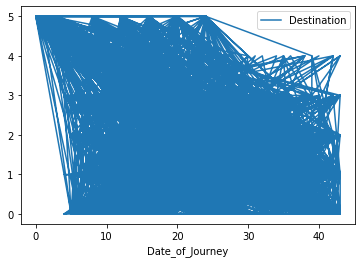

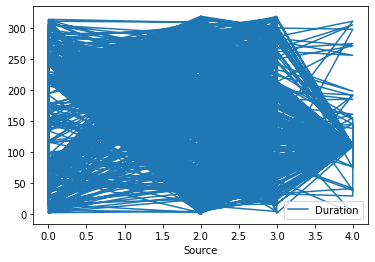

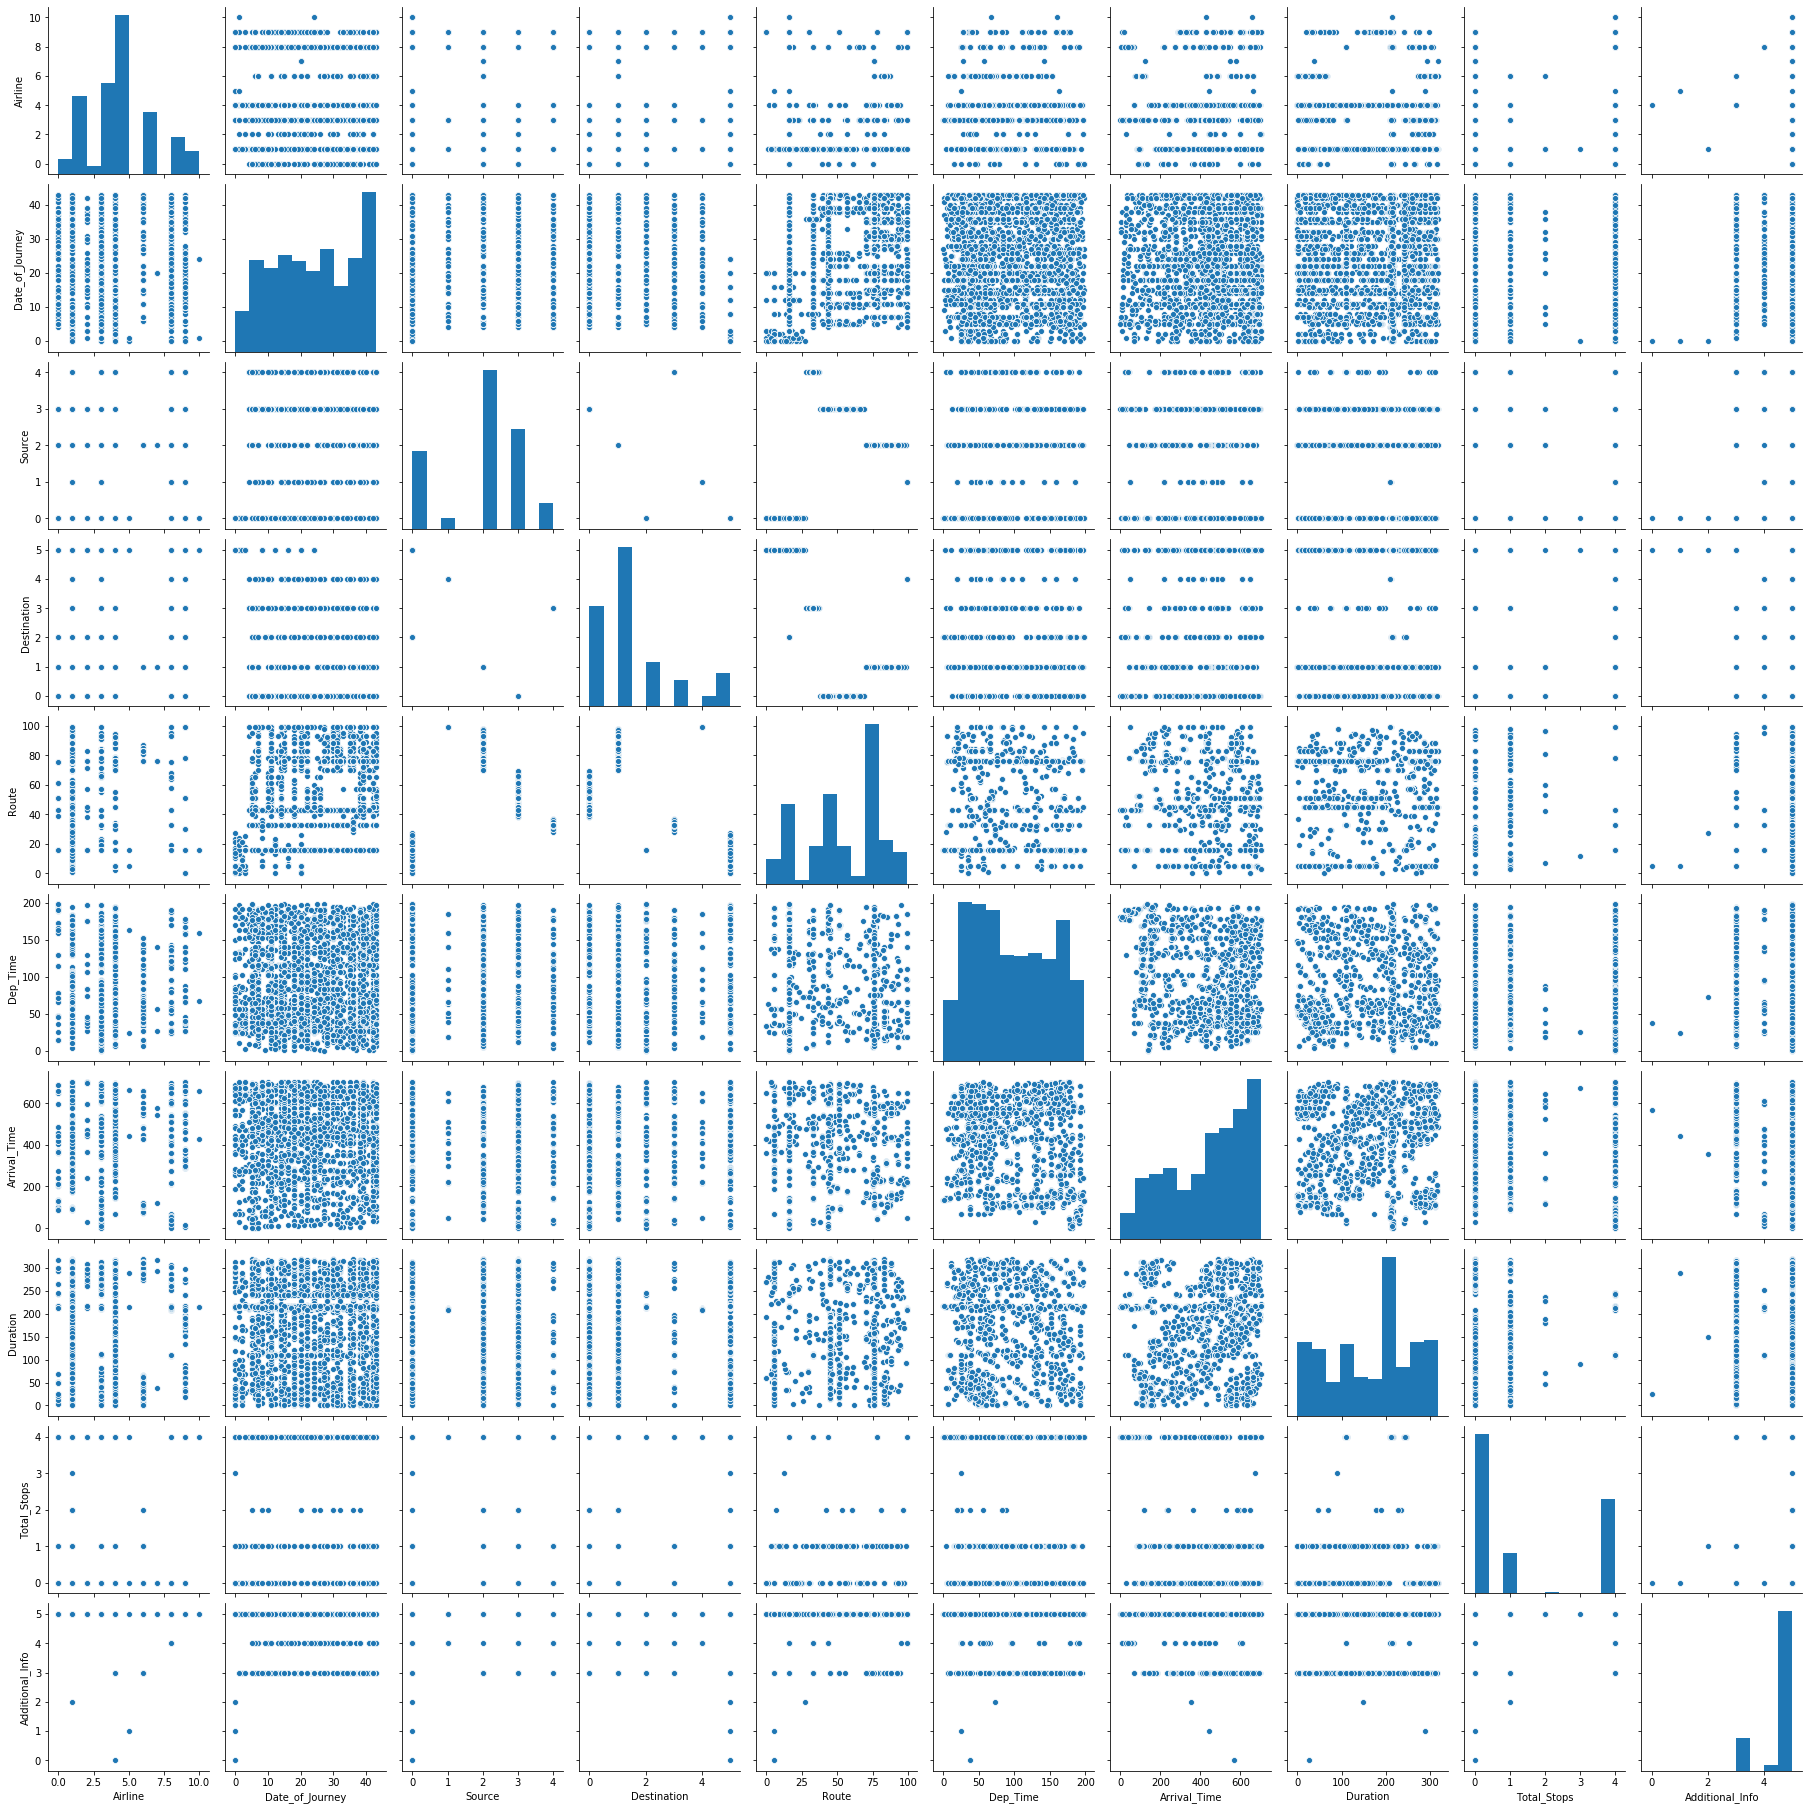


Checking the 'z score' / outliers of the dataset, if present, will remove it


Before removing zscore:  (2645, 10)
After removing zscore:  (2642, 10)

Assigning the input and output data



StandardScaler is used to scale the data



 X shape :  (2642, 10)

Checking the skewness of data


Airline            0.482694
Date_of_Journey   -0.048475
Source            -0.426946
Destination        1.264143
Route             -0.277532
Dep_Time           0.174165
Arrival_Time      -0.528565
Duration          -0.284265
Total_Stops        0.665197
Additional_Info   -1.657085
dtype: float64

Skew val: skew_val



Removing skewness of data



Checking skewness after removing skewed data: 

 Airline            0.482694
Date_of_Journey   -0.048475
Source            -0.426946
Destination        0.158097
Route             -0.277532
Dep_Time           0.174165
Arrival_Time      -0.528565
Duration          -0.284265
Total_Stops       -8.526755
Additional_Info   -1.657085
dtype: float64

Removing skewness

In [88]:
(x2) = my_func(ds, 'Test')
print ('\n Testing dataset shape: ', x2.shape)

In [89]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [90]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x1, y1)


Max r2 score corresponding to  80  is:  0.4940574210147871


In [91]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1, 42)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x1, y1)
gknr.best_params_

{'n_neighbors': 4}

In [92]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors = 4 )
r_state = max_r2_score(knr, x1, y1)


Max r2 score corresponding to  84  is:  0.7296389526441638


In [93]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x1, y1, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x1, y1, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x1, y1, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  0.46088417991167435
Standard deviation for r2 score in linear regression:  0.013148334585164633

*****************

Mean r2 score for KNN regression:  0.6999497040056201
Standard deviation for r2 score in KNN regression:  0.017634184709995483


In [94]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso, Ridge
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x1, y1)
clf.best_params_

{'alpha': 0.1}

In [95]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.001)
r_state = max_r2_score (lsreg, x1, y1)


Max r2 score corresponding to  80  is:  0.49405738619350403


In [96]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x1, y1, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.4608841791817725
Standard deviation in  r2 score for Lasso Regression:  0.01314831175101913


In [97]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 10, 150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x1,y1)
clf.best_params_

{'learning_rate': 1, 'n_estimators': 300}

In [98]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=1, n_estimators=250)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x1, y1, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  0.8952972619194609
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.008654126543544855


In [99]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x1, y1)


Max r2 score corresponding to  84  is:  0.9061411770179211


In [100]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10,100, 150, 200, 250], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor(), Ridge()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x1,y1)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 100}

In [101]:
ada_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), learning_rate=1, n_estimators=100)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x1, y1, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.884879065215215
Standard Deviation in  r2 score for Ada Boosting Regression:  0.006975527719512359


In [102]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x1, y1)


Max r2 score corresponding to  84  is:  0.9029786245188193


We tried all the models and till now GradientBoost Regression is the best. 
Now we will use this model for testing dataset .

In [103]:
# we tried all the models and till now GradientBoost Regression is the best
# random state corresponding to highest r2 score is 84

x_train, x_test, y_train, y_test = train_test_split(x1, y1, random_state=84, test_size = 0.20)
gbr = GradientBoostingRegressor(learning_rate=1, n_estimators=250)
gbr.fit(x_train, y_train)
y_pred =  gbr.predict(x2)
print (y_pred)

[ 9615.53606131  5739.20531911  9675.09005941 ...  8834.57343086
 12141.62071723  8777.90088877]


In [104]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_flight.csv')

In [105]:
# Lets find RMSE and r2 sciore using sklearn.metrics

#print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
#print ('r2 score is: ', r2_score(y_test, y_pred))

In [106]:
#print ("\n Score: ", gbr.score(x_test, y_test))

In [108]:
from sklearn.externals import joblib
joblib.dump(gbr, 'Project_Flight.pkl')
clf = joblib.load('Project_Flight.pkl')
clf.predict(x2)

array([ 9615.53606131,  5739.20531911,  9675.09005941, ...,
        8834.57343086, 12141.62071723,  8777.90088877])